# Regression Analysis of NY population data with total low income data fom USDA Food Access Research Atlas dataset


## This script contains the following points:
1. Import libraries
2. Import new_york.csv dataset
3. Verify the dataset
3. Data prep for regression analysis
4. Regression analysis
5. Evaluate results

### 1. Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### 2. Importing NY State dataset

The dataset new_york.csv was created by filtering data from the USDA FOOD Access Research Atlas inclusive of NYS counties.


In [2]:
path = r'C:\Users\howl6\OneDrive\Certificates\CareerFoundry\Coursework\Data_Immersion\Chapter 6\Food_Desert'

In [3]:
ny_county = pd.read_csv(os.path.join(path, '02_Data', 'cleaned_data', 'new_york2.csv'), index_col=False)

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### 3. Verify the dataset

In [5]:
ny_county.head(60)

,Unnamed: 0,Tract,County,Urban,Total_Population,Housing_Units,High_Share_Group,Total_Group_Quarters,Percent_Group_Quarters,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,Low_Income_Flag,Total_Poverty_Rate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,Total_Low_Income,Total_Kids,Total_Seniors,Total_White,Total_Black,Total_Asian,Total_NHOPI,Total_AIAN,Total_OMulti,Total_Hispanic,Total_No_Vehicle,Total_SNAP,Population_Size
0,0,36001000100,Albany,1,2139,784,0,79.0,3.69,1,1,1,1,1,1,32.5,45515.0,1,1,1,1,1,0,0,1,2139.0,2139.0,2139.0,1246.0,1246.0,1246.0,2139.0,100.00,1246.0,58.26,644.0,30.11,218.0,10.19,506.0,23.66,1396.0,65.26,55.0,2.57,0.0,0.00,9.0,0.42,173.0,8.09,198.0,9.26,172.0,21.94,259.0,32.97,2139.0,100.00,1246.0,58.26,644.0,30.11,218.0,10.19,506.0,23.66,1396.0,65.26,55.0,2.57,0.0,0.00,9.0,0.42,173.0,8.09,198.0,9.26,172.0,21.94,259.0,32.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1183,644,218,506,1396,55,0,9,173,198,179,276,Medium Population
1,1,36001000200,Albany,1,6046,2514,0,84.0,1.39,1,1,1,1,1,1,34.4,39545.0,1,1,1,1,1,0,0,1,2981.0,5948.0,2981.0,2042.0,3389.0,2042.0,5948.0,98.38,3389.0,56.05,1917.0,31.71,398.0,6.58,815.0,13.47,4588.0,75.88,55.0,0.91,0.0,0.00,11.0,0.18,480.0,7.93,635.0,10.51,1070.0,42.58,1113.0,44.27,2981.0,49.31,2042.0,33.77,1068.0,17.66,195.0,3.23,394.0,6.52,2298.0,38.01,21.0,0.36,0.0,0.00,3.0,0.05,264.0,4.37,372.0,6.15,612.0,24.36,556.0,22.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2501,1946,401,840,4647,57,0,12,490,648,895,960,Large Population
2,2,36001000300,Albany,1,5888,2581,0,193.0,3.28,1,1,1,1,1,1,27.0,45384.0,1,1,1,1,1,0,0,1,1151.0,2847.0,1151.0,189.0,1013.0,189.0,2847.0,48.36,1013.0,17.20,496.0,8.42,583.0,9.89,1731.0,29.40,797.0,13.54,132.0,2.24,0.0,0.00,5.0,0.09,181.0,3.08,242.0,4.10,255.0,9.89,292.0,11.30,1151.0,19.55,189.0,3.21,103.0,1.75,325.0,5.52,886.0,15.05,152.0,2.58,80.0,1.36,0.0,0.00,1.0,0.02,32.0,0.54,50.0,0.85,70.0,2.72,129.0,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3006,1297,859,2941,2199,213,1,19,515,615,708,554,Large Population
3,3,36001000401,Alba

In [6]:
ny_county.tail()

,Unnamed: 0,Tract,County,Urban,Total_Population,Housing_Units,High_Share_Group,Total_Group_Quarters,Percent_Group_Quarters,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,HUNVFlag,Low_Income_Flag,Total_Poverty_Rate,MedianFamilyIncome,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,LAPOP1_10,LAPOP05_10,LAPOP1_20,LALOWI1_10,LALOWI05_10,LALOWI1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,Total_Low_Income,Total_Kids,Total_Seniors,Total_White,Total_Black,Total_Asian,Total_NHOPI,Total_AIAN,Total_OMulti,Total_Hispanic,Total_No_Vehicle,Total_SNAP,Population_Size
4865,4865,36123150100,Yates,0,5942,2200,0,134.0,2.26,0,0,0,1,1,1,12.0,64202.0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,4590.0,77.25,1750.0,29.44,1265.0,21.29,790.0,13.29,4463.0,75.12,42.0,0.71,13.0,0.21,1.0,0.02,7.0,0.11,65.0,1.09,94.0,1.58,195.0,8.86,205.0,9.30,4103.0,69.06,1559.0,26.24,1136.0,19.12,719.0,12.10,3989.0,67.14,37.0,0.63,12.0,0.20,0.0,0.00,6.0,0.10,59.0,0.99,88.0,1.48,171.0,7.76,181.0,8.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2467,1624,1015,5787,54,19,1,8,73,110,302,289,Large Population
4866,4866,36123150200,Yates,0,5561,2138,0,287.0,5.16,0,0,0,0,1,0,11.3,77228.0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,3297.0,59.28,1036.0,18.64,972.0,17.49,621.0,11.17,3228.0,58.05,19.0,0.33,8.0,0.14,0.0,0.00,1.0,0.02,41.0,0.74,36.0,0.66,193.0,9.02,80.0,3.74,2488.0,44.74,813.0,14.63,846.0,15.20,320.0,5.76,2436.0,43.80,14.0,0.25,6.0,0.11,0.0,0.00,1.0,0.02,31.0,0.56,25.0,0.44,159.0,7.42,60.0,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1731,1433,1074,5363,57,16,0,7,118,110,421,139,Large Population
4867,4867,36123150300,Yates,0,5348,2074,0,38.0,0.71,0,0,0,0,1,0,12.9,66369.0,0,0,0,0,0,0,0,1,151.0,151.0,NaN,45.0,45.0,NaN,5348.0,100.00,1900.0,35.53,1307.0,24.44,747.0,13.97,5248.0,98.13,23.0,0.43,16.0,0.30,0.0,0.00,6.0,0.11,55.0,1.03,49.0,0.92,125.0,6.01,228.0,11.00,5348.0,100.00,1900.0,35.53,1307.0,24.44,747.0,13.97,5248.0,98.13,23.0,0.43,16.0,0.30,0.0,0.00,6.0,0.11,55.0,1.03,49.0,0.92,125.0,6.01,228.0,11.00,151.0,2.82,45.0,0.85,31.0,0.58,21.0,0.4,149.0,2.78,0.0,0.0,1.0,0.02,0.0,0.0,0.0,0.01,1.0,0.01,0.0,0.0,1.0,0.04,7.0,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1853,1307,747,5248,23,16,0,6,55,49,122,213,Large Population
4868,4868,36123150400,Yates,0,3973,1369,0,828.0,20.84,0,0,0,0,0,0,4

In [7]:
ny_county.shape

(4870, 148)

In [8]:
ny_county.columns

Index(['Unnamed: 0', 'Tract', 'County', 'Urban', 'Total_Population',
       'Housing_Units', 'High_Share_Group', 'Total_Group_Quarters',
       'Percent_Group_Quarters', 'LILATracts_1And10',
       ...
       'Total_White', 'Total_Black', 'Total_Asian', 'Total_NHOPI',
       'Total_AIAN', 'Total_OMulti', 'Total_Hispanic', 'Total_No_Vehicle',
       'Total_SNAP', 'Population_Size'],
      dtype='object', length=148)

In [9]:
ny_county.dtypes

Unnamed: 0                  int64
Tract                       int64
County                     object
Urban                       int64
Total_Population            int64
Housing_Units               int64
High_Share_Group            int64
Total_Group_Quarters      float64
Percent_Group_Quarters    float64
LILATracts_1And10           int64
LILATracts_halfAnd10        int64
LILATracts_1And20           int64
LILATracts_Vehicle          int64
HUNVFlag                    int64
Low_Income_Flag             int64
Total_Poverty_Rate        float64
MedianFamilyIncome        float64
LA1and10                    int64
LAhalfand10                 int64
LA1and20                    int64
LATracts_half               int64
LATracts1                   int64
LATracts10                  int64
LATracts20                  int64
LATractsVehicle_20          int64
LAPOP1_10                 float64
LAPOP05_10                float64
LAPOP1_20                 float64
LALOWI1_10                float64
LALOWI05_10   

In [10]:
ny_county2 = ny_county.drop(columns = ['Unnamed: 0'])

In [11]:
ny_county2.columns

Index(['Tract', 'County', 'Urban', 'Total_Population', 'Housing_Units',
       'High_Share_Group', 'Total_Group_Quarters', 'Percent_Group_Quarters',
       'LILATracts_1And10', 'LILATracts_halfAnd10',
       ...
       'Total_White', 'Total_Black', 'Total_Asian', 'Total_NHOPI',
       'Total_AIAN', 'Total_OMulti', 'Total_Hispanic', 'Total_No_Vehicle',
       'Total_SNAP', 'Population_Size'],
      dtype='object', length=147)

### 4. Data Prep for Regression Analysis

I want to look at the relationship between the total population with total low income in all NY census tracts.

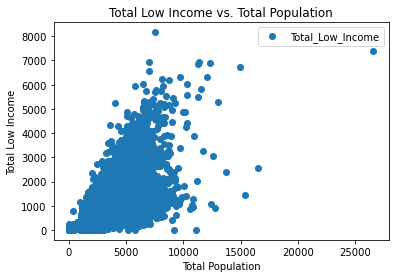

In [29]:
# The style option creates a scatterplot.

ny_county2.plot(x= 'Total_Population', y='Total_Low_Income',style='o') 
plt.title('Total Low Income vs. Total Population')  
plt.xlabel('Total Population')  
plt.ylabel('Total Low Income')  
plt.show()

In [30]:
X = ny_county2['Total_Population'].values.reshape(-1,1)
y = ny_county2['Total_Low_Income'].values.reshape(-1,1)

In [31]:
X

array([[2139],
       [6046],
       [5888],
       ...,
       [5348],
       [3973],
       [4524]], dtype=int64)

In [32]:
y

array([[1183],
       [2501],
       [3006],
       ...,
       [1853],
       [ 476],
       [1517]], dtype=int64)

In [33]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

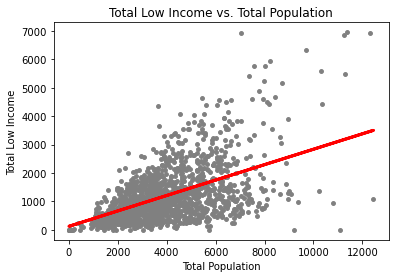

In [37]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Low Income vs. Total Population')
plot_test.xlabel('Total Population')
plot_test.ylabel('Total Low Income')
plot_test.show()

In [38]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.27132841]]
Mean squared error:  697770.7993361618
R2 score:  0.274119426802114


In [40]:
y_predicted

array([[ 856.70827722],
       [2005.78409054],
       [1348.89801166],
       ...,
       [1740.15357785],
       [1805.00106767],
       [ 846.39779767]])

### 5. Regression Analysis

In [41]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,745,856.708277
1,3020,2005.784091
2,440,1348.898012
3,869,1177.418457
4,2212,1584.682399
5,564,1611.001255
6,1132,1055.863330
7,431,559.061012
8,792,1191.798863
9,533,1189.085579


In [42]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.27132841]]
Mean squared error:  697436.5933885947
R2 score:  0.2747314738046165


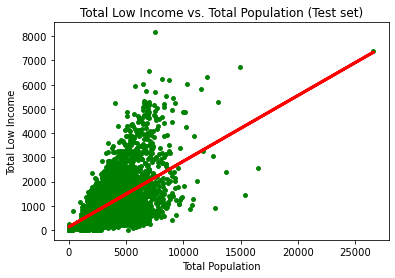

In [29]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total Low Income vs. Total Population (Test set)')
plot_test.xlabel('Total Population')
plot_test.ylabel('Total Low Income')
plot_test.show()

### 6. Evaluate results

The scatter plot of the test set comparing Total Low Income with Total Population shows a large cluster of points for populations at or below 10000 people per census tract. The regression line shows a positive relationship between population and low income, suggesting that as population increases total low income can be expected to increase.  

The MSE is 697437 and the R2 value is 0.27.  

This suggests that while there is a relationship between total population and total low income, it is not a strong one, particularly as population increases beyond 10000 people per census tract. 

There is also a great deal of variance between the actual y variables and predicted y variables.

While total population is an important factor, it is not the most predictive factor in relation to total low income.

The data is based on US Census tracts.  Since census data is based on voluntary self reporting, there may be bias based on potential under reporting of population and income counts in various county tracts.